In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import dictys
from dictys.net import stat
import joblib
from scipy.stats import median_abs_deviation, hypergeom
import math

In [2]:
from utils_custom import *

In [3]:
# Define file paths 
output_folder = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/actb1_added_v2/output/intermediate_tmp_files'
data_folder = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/dictys_outs/actb1_added_v2/output'

In [4]:
# Load data
dictys_dynamic_object = dictys.net.dynamic_network.from_file(os.path.join(data_folder, 'dynamic.h5'))

# Geneset regulatory activity

In [5]:
# load LF files 
z11_file = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/other_files/latent_factors/feature_list_Z11.txt'
z3_file = '/ocean/projects/cis240075p/asachan/datasets/B_Cell/multiome_1st_donor_UPMC_aggr/other_files/latent_factors/feature_list_Z3.txt'

# load into a list of gene names 
z11 = pd.read_csv(z11_file, sep='\t', header=0)
z3 = pd.read_csv(z3_file, sep='\t', header=0)

# get the gene names 
z11_genes = z11['names'].tolist()
z3_genes = z3['names'].tolist()

# create a list of all lf genes 
lf_genes = list(set(z11_genes + z3_genes))


In [6]:
lf_in_object = check_if_gene_in_ndict(dictys_dynamic_object, lf_genes, return_index=True)
print(f"Found {len(lf_in_object['present'])} genes")
print(f"Missing {len(lf_in_object['missing'])} genes")
print("Indices:", lf_in_object['indices'])


Found 68 genes
Missing 0 genes
Indices: {'ANKRD28': 429, 'EEA1': 2862, 'CDK6': 1665, 'HLA-C': 4189, 'TXNDC5': 10727, 'PAX5': 6943, 'MZB1': 6199, 'ELL2': 2979, 'SLAMF7': 8987, 'CD74': 1586, 'HLA-DQA1': 4196, 'HLA-DMB': 4191, 'TNFAIP8': 10337, 'TIAM1': 10070, 'SEL1L3': 8763, 'CD79A': 1587, 'CPEB4': 2131, 'PIM2': 7239, 'PIKFYVE': 7235, 'SLC25A13': 9042, 'GLCCI1': 3767, 'HLA-DQB1': 4198, 'CIITA': 1884, 'HLA-DPA1': 4194, 'HLA-DMA': 4190, 'ARNTL2': 665, 'TRAM1': 10472, 'HM13': 4210, 'SUB1': 9706, 'UBAC2': 10759, 'BTG2': 1106, 'DEK': 2479, 'SSR1': 9582, 'PPIB': 7507, 'HSP90B1': 4304, 'PDE4D': 7027, 'IQGAP2': 4638, 'HLA-DPB1': 4195, 'MED23': 5675, 'MAN1A1': 5488, 'HLA-B': 4188, 'HLA-DRA': 4200, 'IRF4': 4652, 'HLA-A': 4187, 'CD99': 1598, 'SLA': 8982, 'TXNDC11': 10722, 'TBC1D4': 9887, 'RNF213': 8355, 'CEP128': 1733, 'CCSER2': 1534, 'RUNX2': 8586, 'CD52': 1574, 'AFF3': 230, 'IGHM': 4421, 'FNDC3B': 3517, 'LMAN1': 5269, 'XBP1': 11200, 'ARFGAP3': 560, 'B2M': 872, 'MAPK1': 5543, 'GAB1': 3613, 'CTSH':

## Expression dynamics of the genes

In [7]:
# get lcpm chars for these genes
lcpm_dcurve_pb, dtime_pb = compute_expression_regulation_curves(dictys_dynamic_object, start=1, stop=2, num=100, dist=0.0005, mode="expression")
# slice the dcurve for the lf genes using gene names which are indices in pandas df
lf_lcpm_dcurve_pb = lcpm_dcurve_pb.loc[lf_genes]
# get dchars for these genes
lf_lcpm_dchar_pb = compute_curve_characteristics(lf_lcpm_dcurve_pb, dtime_pb)
display(lf_lcpm_dcurve_pb)
# save lf_lcpm_dcurve_pb as pd dataframe pickle
#lf_lcpm_dcurve_pb.to_pickle(os.path.join(output_folder, 'lf_lcpm_dcurve_pb_from_1_to_2.pkl'))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ANKRD28,7.074422,7.085987,7.099022,7.113628,7.129894,7.147900,7.167709,7.189368,7.212904,7.238326,...,9.387767,9.397883,9.408054,9.418254,9.428457,9.438638,9.448775,9.458844,9.468823,9.478691
EEA1,7.657040,7.661683,7.666640,7.671864,7.677296,7.682866,7.688490,7.694080,7.699541,7.704784,...,6.189109,6.170030,6.151467,6.133377,6.115724,6.098480,6.081625,6.065143,6.049023,6.033261
CDK6,9.062291,9.054232,9.045419,9.035768,9.025190,9.013599,9.000910,8.987042,8.971923,8.955494,...,9.332382,9.338297,9.344007,9.349518,9.354833,9.359953,9.364881,9.369616,9.374160,9.378513
HLA-C,8.665794,8.660763,8.655121,8.648860,8.641987,8.634521,8.626499,8.617975,8.609018,8.599716,...,9.597972,9.604083,9.610275,9.616536,9.622853,9.629211,9.635594,9.641985,9.648369,9.654728
TXNDC5,5.936791,5.947717,5.959511,5.972157,5.985623,5.999866,6.014826,6.030437,6.046629,6.063333,...,9.819092,9.835189,9.850155,9.864055,9.876948,9.888893,9.899945,9.910156,9.919578,9.928258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAM2,3.175143,3.187959,3.201576,3.216015,3.231292,3.247420,3.264411,3.282275,3.301023,3.320672,...,7.596763,7.608408,7.619443,7.629897,7.639795,7.649161,7.658019,7.666391,7.674299,7.681763
FNDC3A,8.313908,8.304580,8.294609,8.284016,8.272836,8.261125,8.248953,8.236406,8.223584,8.210598,...,9.709073,9.724517,9.739449,9.753883,9.767832,9.781307,9.794316,9.806868,9.818972,9.830633
HLA-DRB1,9.388182,9.403360,9.418567,9.433545,9.447995,9.461579,9.473930,9.484667,9.493407,9.499785,...,8.713141,8.696152,8.679995,8.664647,8.650083,8.636278,8.623206,8.610842,8.599159,8.588133
PRDM1,3.992050,3.967246,3.941576,3.915438,3.889329,3.863839,3.839644,3.817486,3.798153,3.782444,...,9.154795,9.160706,9.166535,9.172299,9.178009,9.183672,9.189294,9.194875,9.200415,9.205912


In [8]:
# get lcpm chars for these genes
lcpm_dcurve_gc, dtime_gc = compute_expression_regulation_curves(dictys_dynamic_object, start=1, stop=3, num=100, dist=0.0005, mode="expression")
# slice the dcurve for the lf genes using gene names which are indices in pandas df
lf_lcpm_dcurve_gc = lcpm_dcurve_gc.loc[lf_genes]
# get dchars for these genes
lf_lcpm_dchar_gc = compute_curve_characteristics(lf_lcpm_dcurve_gc, dtime_gc)
display(lf_lcpm_dcurve_gc)
# save lf_lcpm_dcurve_gc as pickle
#lf_lcpm_dcurve_gc.to_pickle(os.path.join(output_folder, 'lf_lcpm_dcurve_gc_from_1_to_3.pkl'))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ANKRD28,7.074321,7.083483,7.093571,7.104634,7.116715,7.129853,7.144079,7.159414,7.175873,7.193458,...,7.660054,7.657339,7.654859,7.652587,7.650497,7.648569,7.646783,7.645124,7.643577,7.642129
EEA1,7.656962,7.660653,7.664544,7.668612,7.672828,7.677155,7.681552,7.685971,7.690361,7.694667,...,7.897635,7.899543,7.901359,7.903095,7.904759,7.906359,7.907903,7.909397,7.910845,7.912252
CDK6,9.062461,9.056082,9.049243,9.041904,9.034028,9.025575,9.016510,9.006800,8.996418,8.985340,...,9.047924,9.046425,9.044850,9.043204,9.041494,9.039723,9.037896,9.036016,9.034087,9.032112
HLA-C,8.665815,8.661814,8.657419,8.652623,8.647427,8.641834,8.635857,8.629511,8.622821,8.615818,...,8.556782,8.553772,8.550905,8.548166,8.545542,8.543022,8.540597,8.538256,8.535993,8.533802
TXNDC5,5.936788,5.945506,5.954782,5.964604,5.974958,5.985819,5.997155,6.008927,6.021090,6.033594,...,6.485393,6.480870,6.476763,6.473025,6.469614,6.466494,6.463632,6.461000,6.458573,6.456328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRAM2,3.175281,3.185565,3.196368,3.207699,3.219566,3.231975,3.244930,3.258432,3.272480,3.287073,...,5.132426,5.126363,5.120741,5.115506,5.110611,5.106014,5.101676,5.097566,5.093655,5.089917
FNDC3A,8.313953,8.306505,8.298641,8.290372,8.281715,8.272691,8.263333,8.253679,8.243774,8.233669,...,7.829399,7.828945,7.828699,7.828634,7.828731,7.828968,7.829329,7.829798,7.830363,7.831011
HLA-DRB1,9.388173,9.400390,9.412658,9.424850,9.436820,9.448407,9.459435,9.469716,9.479055,9.487256,...,8.641651,8.643624,8.645825,8.648227,8.650809,8.653551,8.656436,8.659449,8.662577,8.665808
PRDM1,3.992225,3.972356,3.951881,3.930995,3.909928,3.888953,3.868379,3.848551,3.829840,3.812638,...,4.303922,4.286446,4.270454,4.255794,4.242329,4.229938,4.218515,4.207964,4.198200,4.189147


#### Get the curvature of the lcpm expression of all lf genes

In [10]:
# Apply to each gene in lf_lcpm_dcurve_pb
lf_lcpm_curvature_pb = get_curvature_of_expression(lf_lcpm_dcurve_pb, dtime_pb)
lf_lcpm_curvature_gc = get_curvature_of_expression(lf_lcpm_dcurve_gc, dtime_gc)
# save lf_lcpm_curvature_pb as pickle
#lf_lcpm_curvature_pb.to_pickle(os.path.join(output_folder, 'lf_lcpm_curvature_pb.pkl'))
# save lf_lcpm_curvature_gc as pickle
#lf_lcpm_curvature_gc.to_pickle(os.path.join(output_folder, 'lf_lcpm_curvature_gc.pkl'))

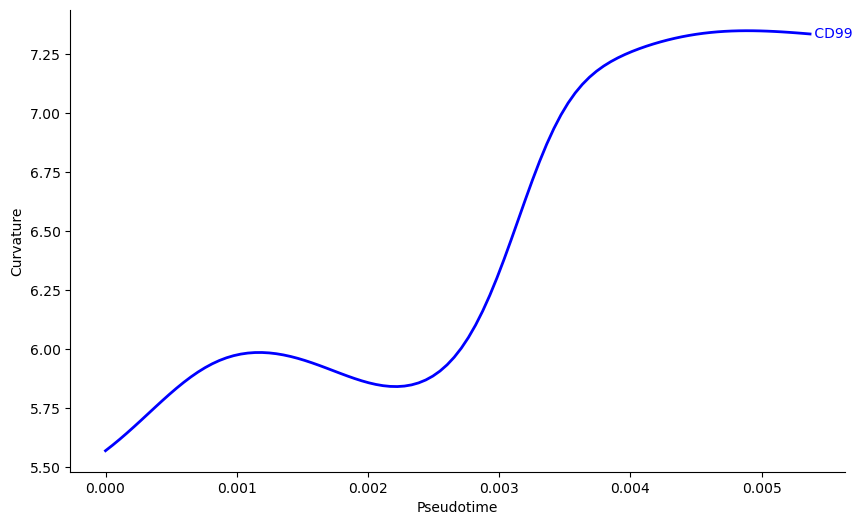

In [11]:
# Plot expression trajectories
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Highlight specific genes
genes_of_interest = ['CD99']
colors = ['blue']   # Define colors for each gene

for gene, color in zip(genes_of_interest, colors):
    if gene in lf_lcpm_dcurve_pb.index:
        line = plt.plot(dtime_pb, lf_lcpm_dcurve_pb.loc[gene], linewidth=2, color=color)
        # Add label at the end of the line
        plt.text(dtime_pb.iloc[-1], lf_lcpm_dcurve_pb.loc[gene].iloc[-1], f' {gene}', 
                color=color, 
                verticalalignment='center')

plt.xlabel('Pseudotime')
plt.ylabel('Curvature')
plt.show()

# Regulations and beta characteristics

#### Get subnetworks for the dynamic genes in one lineage

In [15]:
pts, fsmooth = dictys_dynamic_object.linspace(1,3,100,0.0005)
stat1_net = fsmooth(stat.net(dictys_dynamic_object))
stat1_netbin = stat.fbinarize(stat1_net,sparsity=0.01)
stat1_x=stat.pseudotime(dictys_dynamic_object,pts)
dtime = pd.Series(stat1_x.compute(pts)[0])

In [ ]:
# compute the binary network to get the indices of genes to keep based on sparsity
dnetbin = stat1_netbin.compute(pts)
display(dnetbin.shape)

In [ ]:
# compute the weighted network
dnet = stat1_net.compute(pts)
display(dnet.shape)

In [29]:
# # save the dnet and dnetbin as npy 
# np.save(os.path.join(output_folder, 'dnet_pb_from_1_to_2.npy'), dnet)
# np.save(os.path.join(output_folder, 'dnetbin_pb_from_1_to_2.npy'), dnetbin)


In [12]:
# load the dnet and dnetbin
dnet = np.load(os.path.join(output_folder, 'dnet_gc.npy'))
dnetbin = np.load(os.path.join(output_folder, 'dnetbin_gc.npy'))

In [ ]:
# get indices of the dynamic_pb_genes
lf_genes_indices = get_gene_indices(dictys_dynamic_object, lf_genes)
display(len(lf_genes_indices))  

In [ ]:
subnetworks_bin = dnetbin[np.ix_(range(dnetbin.shape[0]), lf_genes_indices, range(dnetbin.shape[2]))]
display(subnetworks_bin.shape)

#### Filter TFs from the entire list (551)

In [ ]:
# Calculate sparsity for each TF (across all genes and timepoints)
TF_density = (subnetworks_bin != 0).mean(axis=(1, 2))
# Keep TFs that are non-zero more than x% of the time
TFs_to_keep = TF_density > 0.01
TFs_to_keep_indices = np.where(TFs_to_keep)[0]

# Get TF names
# Create reverse mapping: index -> gene_name
ndict = dictys_dynamic_object.ndict
index_to_gene = {idx: name for name, idx in ndict.items()}
# Get TF_gene_indices from TFs_to_keep_indices using nids[0]
TFs_to_keep_gene_indices = [dictys_dynamic_object.nids[0][tf_idx] for tf_idx in TFs_to_keep_indices]
kept_tf_names = [index_to_gene[idx] for idx in TFs_to_keep_gene_indices]
print(len(kept_tf_names))

In [ ]:
# Get the subnetworks for the kept TFs
filtered_subnetworks = dnet[np.ix_(TFs_to_keep_indices, lf_genes_indices, range(dnet.shape[2]))]
display(filtered_subnetworks.shape)

#### Get beta curves for a lineage


In [ ]:
# Create multi-index tuples (all combinations of TF-target pairs)
index_tuples = [(tf, target) for tf in kept_tf_names for target in lf_genes]
multi_index = pd.MultiIndex.from_tuples(index_tuples, names=['TF', 'Target'])
# Reshape the subnetworks array to 2D (pairs × time points)
n_tfs, n_targets, n_times = filtered_subnetworks.shape
reshaped_data = filtered_subnetworks.reshape(-1, n_times)

# Create DataFrame with multi-index
lf_beta_dcurve = pd.DataFrame(
    reshaped_data,
    index=multi_index,
    columns=[f'time_{i}' for i in range(n_times)]
)
display(lf_beta_dcurve.head())

In [ ]:
# Plot beta trajectories
fig = plt.figure(figsize=(10, 6))
ax = plt.gca()  # Get current axes

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Specify TF-target pairs of interest
regulations_of_interest = [('PRDM1', 'AFF3')]
colors = ['green']   # Define colors for each regulation

for (tf, target), color in zip(regulations_of_interest, colors):
    # Create multi-index key for the regulation
    idx = pd.MultiIndex.from_tuples([(tf, target)])
    if (tf, target) in lf_beta_dcurve.index:
        line = plt.plot(dtime, lf_beta_dcurve.loc[(tf, target)], 
                       linewidth=2, color=color)
        # Add label at the end of the line
        plt.text(dtime.iloc[-1], 
                lf_beta_dcurve.loc[(tf, target)].iloc[-1], 
                f' {tf}->{target}', 
                color=color, 
                verticalalignment='center')

plt.xlabel('Pseudotime')
plt.ylabel('Regulatory strength (β)')
plt.title('Regulatory dynamics')
plt.show()

## Getting the top regulations for a geneset
### 1. Per-gene get the max force at each time-point to get the regulations that explain the gene's expression dynamics best. Directionality does not matter in this selection of the maximum force.

In [ ]:
# get the tf_lcpms for the lineage
kept_tfs_lcpm_dcurve = lcpm_dcurve_gc.loc[kept_tf_names]
print(len(kept_tfs_lcpm_dcurve))

In [ ]:
lf_forces_dcurve = calculate_force_curves(lf_beta_dcurve, kept_tfs_lcpm_dcurve)
display(lf_forces_dcurve.head())
display(lf_forces_dcurve.shape)

In [38]:
# save the lf_forces_dcurve_pb as a pickle
lf_forces_dcurve.to_pickle(os.path.join(output_folder, 'lf_forces_dcurve_gc.pkl'))
# load lf_forces_dcurve_pb from pickle
#lf_forces_dcurve_pb = pd.read_pickle(os.path.join(output_folder, 'lf_forces_dcurve_pb.pkl'))


In [ ]:
lf_force_curves_sorted_by_target = lf_forces_dcurve.sort_index(level=1)
display(lf_force_curves_sorted_by_target.head())
display(lf_force_curves_sorted_by_target.shape)

In [28]:
def find_max_force_per_target(force_df):
    """
    Find TFs exerting maximum absolute force per target at each timepoint
    Returns DataFrame with force trajectories ordered by time of maximum force
    """
    # Initialize dictionary to store results
    max_force_dict = {}
    # Get unique targets
    targets = force_df.index.get_level_values(1).unique()
    # Process each target
    for target in targets:
        # Get all TFs for this target using boolean indexing
        target_mask = force_df.index.get_level_values(1) == target
        target_data = force_df[target_mask]
        # Store the max force TF indices for each timepoint
        max_force_indices = []
        for col in force_df.columns:
            # Find TF with max absolute force at this time point
            max_force_idx = target_data[col].abs().idxmax()
            max_force_indices.append(max_force_idx)
        # Get the force trajectories for these TFs
        max_force_trajectories = force_df.loc[max_force_indices]
        max_force_dict[target] = max_force_trajectories
    # Concatenate all target results
    result_df = pd.concat(max_force_dict.values())
    return result_df

def find_top_k_forces_per_target(force_df, k=5):
    """
    Find the top 5 TFs exerting maximum absolute force per target at each timepoint.
    Returns a DataFrame with force trajectories ordered by time of maximum force.
    """
    # Initialize dictionary to store results
    top_force_dict = {}
    
    # Get unique targets
    targets = force_df.index.get_level_values(1).unique()
    
    # Process each target
    for target in targets:
        # Get all TFs for this target using boolean indexing
        target_mask = force_df.index.get_level_values(1) == target
        target_data = force_df[target_mask]
        
        # Store the top 5 force TF indices for each timepoint
        top_force_indices = []
        for col in force_df.columns:
            # Get indices of the top 5 TFs with max absolute force at this time point
            top_force_idx = target_data[col].abs().nlargest(k).index
            top_force_indices.extend(top_force_idx)
        
        # Get the force trajectories for these TFs
        top_force_trajectories = force_df.loc[top_force_indices]
        top_force_dict[target] = top_force_trajectories
    
    # Concatenate all target results
    result_df = pd.concat(top_force_dict.values())
    return result_df

def find_top_k_forces_per_target_gpu(force_df, k=5):
    try:
        import cudf
        import cupy as cp
        from numba import cuda
        gpu_available = True
    except ImportError:
        print("GPU libraries not available. Install RAPIDS (cudf, cupy) for GPU acceleration.")
        print("Falling back to CPU implementation.")
        return find_top_k_forces_per_target(force_df, k)
    
    # Initialize dictionary to store results
    top_force_dict = {}
    
    # Get unique targets
    targets = force_df.index.get_level_values(1).unique()
    
    # Process targets in parallel batches
    batch_size = min(100, len(targets))  # Adjust batch size based on GPU memory
    for batch_start in range(0, len(targets), batch_size):
        batch_targets = targets[batch_start:batch_start + batch_size]
        
        # Process each target in the batch
        for target in batch_targets:
            # Get all TFs for this target using boolean indexing
            target_mask = force_df.index.get_level_values(1) == target
            target_data = force_df[target_mask]
            
            # Convert to GPU DataFrame
            gpu_data = cudf.from_pandas(target_data)
            
            # Store the top k force TF indices for each timepoint
            top_force_indices = []
            
            # Process columns in batches to avoid GPU memory issues
            col_batch_size = 20  # Adjust based on available GPU memory
            for col_start in range(0, len(target_data.columns), col_batch_size):
                col_batch = target_data.columns[col_start:col_start + col_batch_size]
                
                for col in col_batch:
                    # Find top k TFs with max absolute force at this timepoint
                    abs_series = gpu_data[col].abs()
                    top_k_indices = abs_series.nlargest(k).index.to_pandas()
                    top_force_indices.extend(top_k_indices)
            
            # Get the force trajectories for these TFs and move back to CPU
            top_force_trajectories = force_df.loc[top_force_indices]
            top_force_dict[target] = top_force_trajectories
            
            # Clear GPU memory
            del gpu_data
            cuda.current_context().memory_manager.deallocations.clear()
    
    # Concatenate all target results
    result_df = pd.concat(top_force_dict.values())
    return result_df

def find_top_k_forces_per_target_parallel(force_df, k=5, n_jobs=None):
    import multiprocessing as mp
    from functools import partial
    from tqdm import tqdm
    
    # Helper function to process a single target
    def process_target(target, force_df, k):
        # Get all TFs for this target using boolean indexing
        target_mask = force_df.index.get_level_values(1) == target
        target_data = force_df[target_mask]
        # Store the top k force TF indices for each timepoint
        top_force_indices = []
        for col in force_df.columns:
            # Get indices of the top k TFs with max absolute force at this time point
            top_force_idx = target_data[col].abs().nlargest(k).index
            top_force_indices.extend(top_force_idx)
        # Get the force trajectories for these TFs
        top_force_trajectories = force_df.loc[top_force_indices]
        return top_force_trajectories
    # Get unique targets
    targets = force_df.index.get_level_values(1).unique()
    # Set number of processes
    if n_jobs is None:
        n_jobs = mp.cpu_count()
    print(f"Processing {len(targets)} targets using {n_jobs} CPU cores...")
    # Create a process pool
    with mp.Pool(processes=n_jobs) as pool:
        # Create a partial function with fixed arguments
        process_func = partial(process_target, force_df=force_df, k=k)
        
        # Process targets in parallel with progress bar
        results = list(tqdm(
            pool.imap(process_func, targets),
            total=len(targets),
            desc="Finding top TF regulators"
        ))
    # Concatenate all target results
    result_df = pd.concat(results)
    print(f"Completed processing. Found {len(result_df)} TF-target regulations.")
    return result_df


In [29]:
# Get max force
max_force_trajectories = find_top_k_forces_per_target(lf_force_curves_sorted_by_target, k=5)

In [ ]:
display(max_force_trajectories.head())
display(max_force_trajectories.shape)

In [ ]:
lf_gene_regulations = get_unique_regs_by_target(max_force_trajectories)
# Get all unique TFs
all_tfs = set(tf for regs in lf_gene_regulations.values() 
                for tf, _ in regs)

# Create dictionary of TF -> list of targets
tf_to_targets = {}
for tf in all_tfs:
    # Find all targets regulated by this TF
    targets = [target for target, regs in lf_gene_regulations.items() 
                if any(reg[0] == tf for reg in regs)]
    tf_to_targets[tf] = targets
print(tf_to_targets)
print(len(all_tfs))
print(sum(len(values) for values in tf_to_targets.values()))

In [45]:
# # save tf_to_targets as a pickle
# import pickle
# with open(os.path.join(output_folder, 'top_5_TFs_per_target_pb_from_1_to_2.pkl'), 'wb') as f:
#     pickle.dump(tf_to_targets, f)


In [ ]:
fig, ax, force_values = plot_force_heatmap(
    force_df=lf_forces_dcurve,
    dtime=dtime,
    #regulations=lf_gene_regulations['HLA-DPA1'],
    tf_to_targets_dict={'PRDM1': tf_to_targets['PRDM1']},
    figsize=(12, 6),
    cmap='RdYlGn'
)

# Enrichment score for TFs related to the LF

In [13]:
def enrichment(M,n,N,X):
    # M is the total number of items in the population ===> Total starting genes (universe)
    # n is the number of successes in the population ===> Downstream genes of a TF
    # N is the sample size ===> Total SLIDE genes in LF
    # X is the number of successes in the sample.
    p_value = 1 - hypergeom.cdf(X-1, M, n, N)   # Compute the p-value for observing X or more successes
    score = math.log2((X/n)/(N/M))
    return (score, p_value)

In [14]:
# load the filtered_tfs from top 5 TFs per target
import pickle
tf_to_targets = pickle.load(open(os.path.join(output_folder, 'top_5_TFs_per_target_gc.pkl'), 'rb'))

In [15]:
# get the total down-stream targets of the filtered TFs
filtered_tfs = list(tf_to_targets.keys())
filtered_tfs_indices, _, _ = get_tf_indices(dictys_dynamic_object, filtered_tfs)
print(len(filtered_tfs_indices))

165


In [16]:
# Get the subnetworks for the kept TFs
filtered_subnetworks_max_force_tfs = dnet[np.ix_(filtered_tfs_indices, range(dnet.shape[1]), range(dnet.shape[2]))]
display(filtered_subnetworks_max_force_tfs.shape)

(165, 11907, 100)

In [17]:
# Create multi-index tuples (all combinations of TF-target pairs)
index_tuples = [(tf, target) for tf in filtered_tfs for target in dictys_dynamic_object.ndict.keys()]
multi_index = pd.MultiIndex.from_tuples(index_tuples, names=['TF', 'Target'])
# Reshape the subnetworks array to 2D (pairs × time points)
n_tfs, n_targets, n_times = filtered_subnetworks_max_force_tfs.shape
reshaped_data = filtered_subnetworks_max_force_tfs.reshape(-1, n_times)

# Create DataFrame with multi-index
max_force_tfs_beta_dcurve = pd.DataFrame(
    reshaped_data,
    index=multi_index,
    columns=[f'time_{i}' for i in range(n_times)]
)
display(max_force_tfs_beta_dcurve.head())

time_0  time_1  time_2  time_3  time_4  time_5  time_6  time_7  \
TF   Target                                                                     
BATF A1BG         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
     A1BG-AS1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
     AAAS         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
     AACS         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
     AAGAB        0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

               time_8  time_9  ...  time_90  time_91  time_92  time_93  \
TF   Target                    ...                                       
BATF A1BG         0.0     0.0  ...      0.0      0.0      0.0      0.0   
     A1BG-AS1     0.0     0.0  ...      0.0      0.0      0.0      0.0   
     AAAS         0.0     0.0  ...      0.0      0.0      0.0      0.0   
     AACS         0.0     0.0  ...      0.0      0.0      0.0      0.0   
     AAGAB        0.0     0.0  ...      0.0      0.0      0.0      0.0   

               time_94  time_95  time_96  time_97  time_98  time_99  
TF   Target                                                          
BATF A1BG          0.0      0.0      0.0      0.0      0.0      0.0  
     A1BG-AS1      0.0      0.0      0.0      0.0      0.0      0.0  
     AAAS          0.0      0.0      0.0      0.0      0.0      0.0  
     AACS          0.0      0.0      0.0      0.0      0.0      0.0  
     AAGAB         0.0      0.0      0.0      0.0      0.0      0.0  

[5 rows x 100 columns]

In [18]:
# get the tf_lcpms for the lineage
filtered_tfs_lcpm_dcurve = lcpm_dcurve_gc.loc[filtered_tfs]
print(len(filtered_tfs_lcpm_dcurve))

165


In [19]:
filtered_tfs_all_forces_dcurve = calculate_force_curves(max_force_tfs_beta_dcurve, filtered_tfs_lcpm_dcurve)
filtered_tfs_all_forces_dcurve = filtered_tfs_all_forces_dcurve.sort_index(level=1)
display(filtered_tfs_all_forces_dcurve.head())
display(filtered_tfs_all_forces_dcurve.shape)

NameError: name 'calculate_force_curves' is not defined

In [ ]:
max_force_trajectories_filtered_tfs = find_top_k_forces_per_target_parallel(
    filtered_tfs_all_forces_dcurve, 
    k=5, 
    n_jobs=16  # Adjust based on your system
)
display(max_force_trajectories_filtered_tfs.head())
display(max_force_trajectories_filtered_tfs.shape)

In [ ]:
# get the unique regulations for the max force tfs
filtered_tfs_downstrm_regulations = get_unique_regs_by_target(max_force_trajectories_filtered_tfs)